In [1]:
# ----------------------------------------------------------------------------
#
# TITLE - 1D_radial_DF_sgr_passage.ipynb
# AUTHOR - James Lane
# PROJECT - AST 1501
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Look at some of the model calculated Sgr passage DFs
'''

__author__ = "James Lane"

In [2]:
## Imports

## Basic
import numpy as np
import sys, os, pdb, glob
import copy
import time
from tqdm import tqdm_notebook as tqdm_nb

## Plotting
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import cm

## Astropy
from astropy import units as apu
from astropy.io import fits

## galpy
from galpy import orbit
from galpy import potential
from galpy import df
from galpy.actionAngle import actionAngleAdiabatic
from galpy.actionAngle import actionAngleStaeckel
from galpy.util import bovy_coords as gpcoords
from galpy.util import bovy_conversion as gpconv

## Scipy
from scipy.stats import binned_statistic_2d, binned_statistic
from scipy.optimize import curve_fit

## Add project-specific package. Assume relative location
sys.path.append('../../src/')
import ast1501.potential
import ast1501.util
import ast1501.fourier

In [3]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Meta

## Future work

## Information
- Galpy notes on the DF: https://galpy.readthedocs.io/en/latest/diskdf.html
- Galpy notes on the actions: https://galpy.readthedocs.io/en/latest/actionAngle.html

# Prepare
Declare the keywords for the analysis, make the potential, and the DF

## Functions

## Keywords and File Names

In [7]:
dehnen_dir = '../../scripts/dehnen_method/'
sgr_filename = dehnen_dir+'sgr_passage_df/2020-02-10/data_sgr_mop.npy'
lsbar_filename = dehnen_dir+'lsbar_df/2019-05-27/data.npy'
labels = ['SGR','LSBAR']

print(sgr_filename)
print(lsbar_filename)

../../scripts/dehnen_method/sgr_passage_df/2020-02-10/data_sgr_mop.npy
../../scripts/dehnen_method/lsbar_df/2019-05-27/data.npy


In [9]:
test_df_data = np.load(sgr_filename)
R_range = np.sort( np.unique(test_df_data[:,0]).astype(float) )
n_R = len(R_range)

# Plot tangential velocity

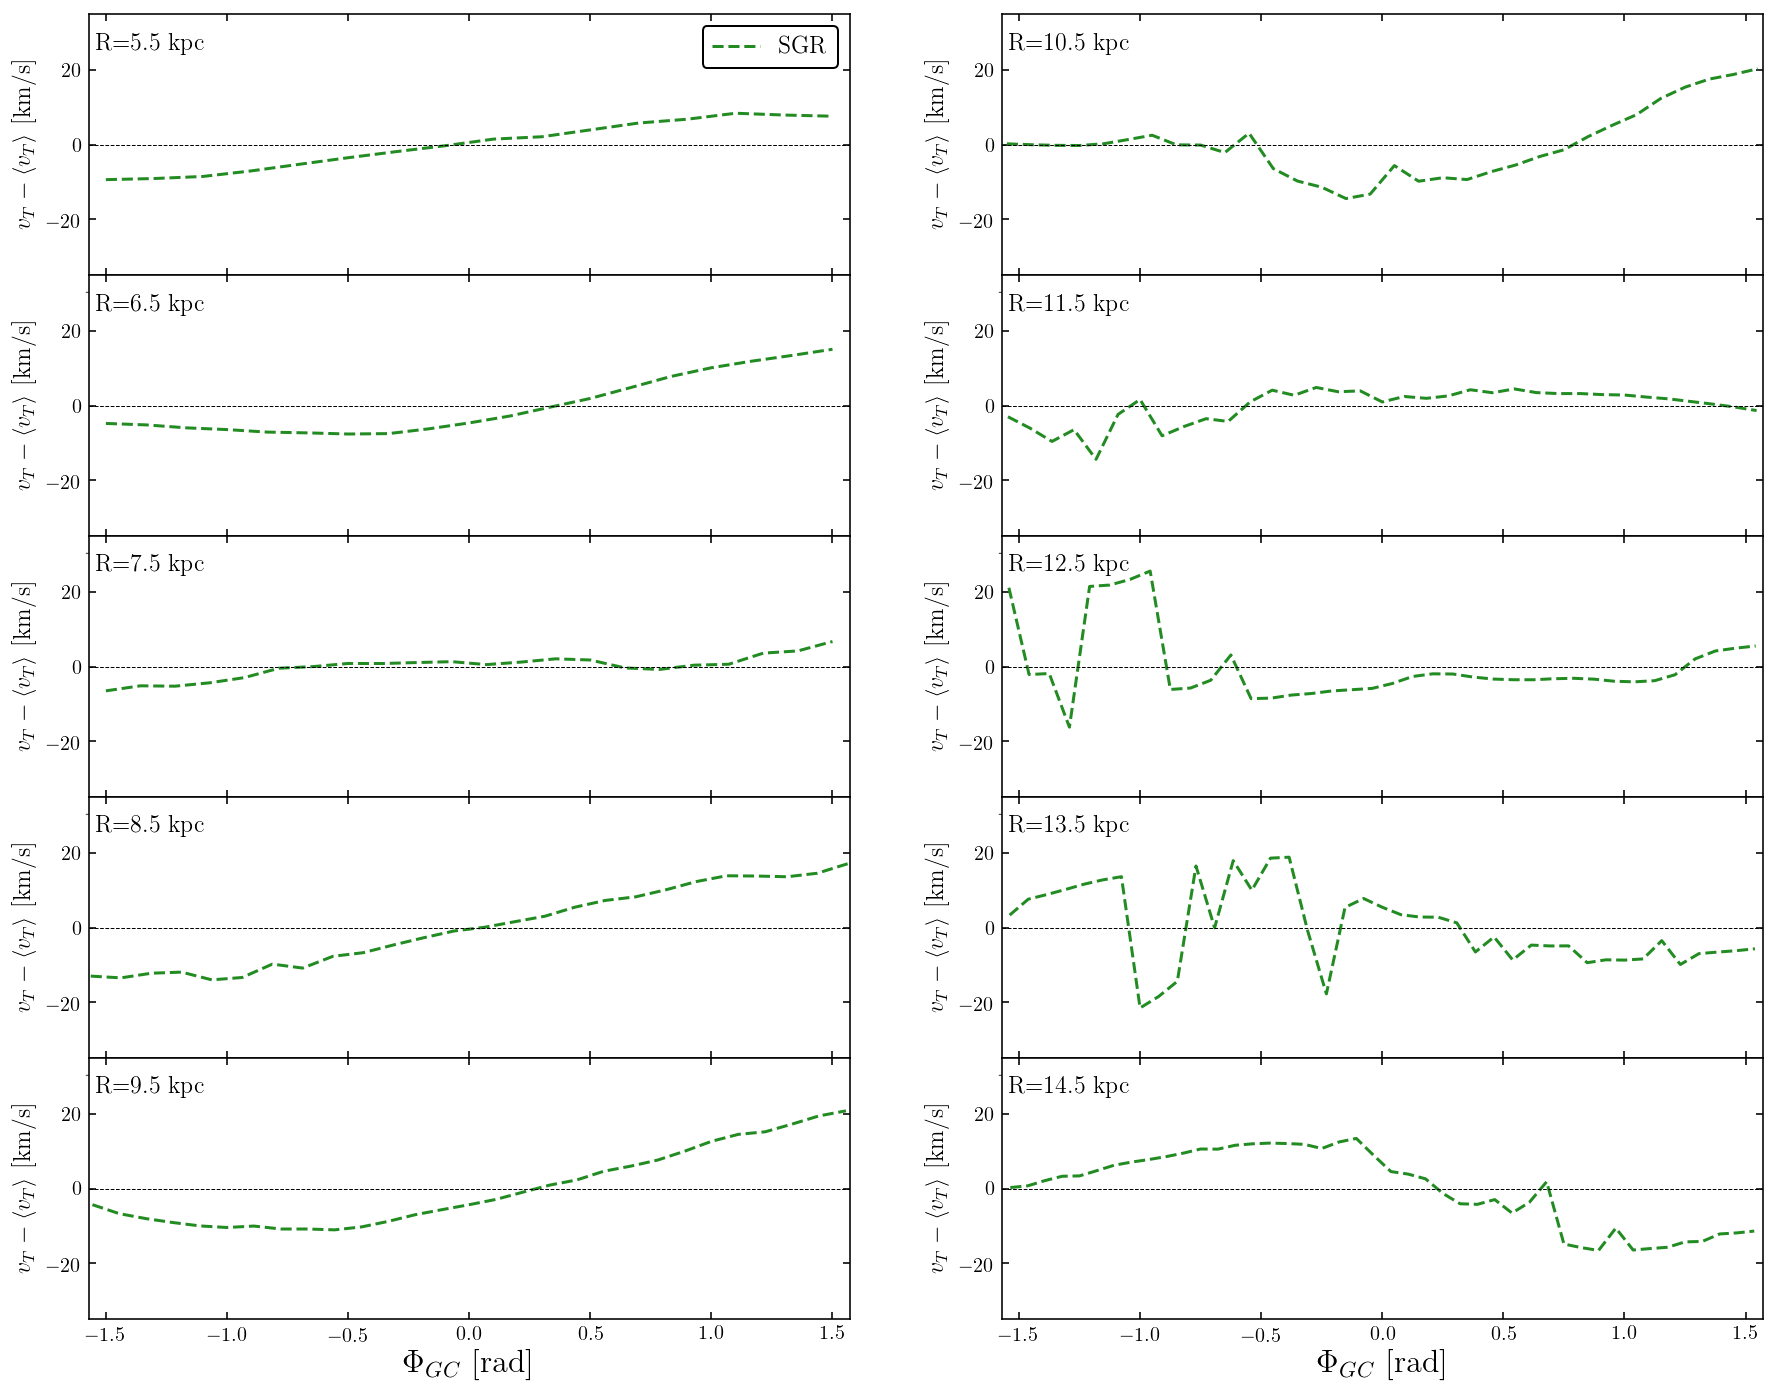

<Figure size 432x288 with 0 Axes>

In [18]:
vel_ind = 6 # Index for tangential velocity

# Make the figure. 4 columns of axes, one for each radial bin.
fig = plt.figure( figsize=(15,int(n_R)+2 ) )
axs = fig.subplots( nrows=int(n_R/2), ncols=2 ).T.reshape(n_R)

# Load the data
sgr_data = np.load( sgr_filename ).astype(float)
    
# Loop over each radial bin
for j in range( n_R ):

    # Load data
    where_current_R_sgr = np.where( sgr_data[:,0] == R_range[j] )[0]

    # Get the velocity and angle
    sgr_v = sgr_data[ where_current_R_sgr, vel_ind ]
    sgr_v -= np.mean(sgr_v)
    sgr_phi = sgr_data[ where_current_R_sgr, 1 ]

    # Plot the data
    axs[j].plot(sgr_phi, sgr_v, color='ForestGreen', linestyle='dashed',
                     label=labels[0])

    # Decorate
    axs[j].axhline(0, linestyle='dashed', color='Black', linewidth=0.5)
    axs[j].set_xlim(-np.pi/2,np.pi/2)
    axs[j].set_ylim(-35,35)
    axs[j].annotate(r'R='+str(R_range[j])+' kpc', (0.01,0.86), xycoords='axes fraction', fontsize=12)
    axs[j].set_ylabel(r'$v_{T}- \langle {v_{T}} \rangle$ [km/s]', fontsize=12)

    if j!=int((n_R/2)-1) or j!=int(n_R-1):
        axs[j].tick_params(labelbottom='off')
    ##fi
###j

# Final decorate
axs[0].legend(loc='best', fontsize=12)
axs[-1].set_xlabel(r'$\Phi_{GC}$ [rad]', fontsize=16)
axs[int(n_R/2)-1].set_xlabel(r'$\Phi_{GC}$ [rad]', fontsize=16)

fig.subplots_adjust(hspace=0)
fig.set_facecolor('white')
plt.show()
plt.savefig('plots/sgr_vt.pdf')
pass;
###i

# Plot radial velocity

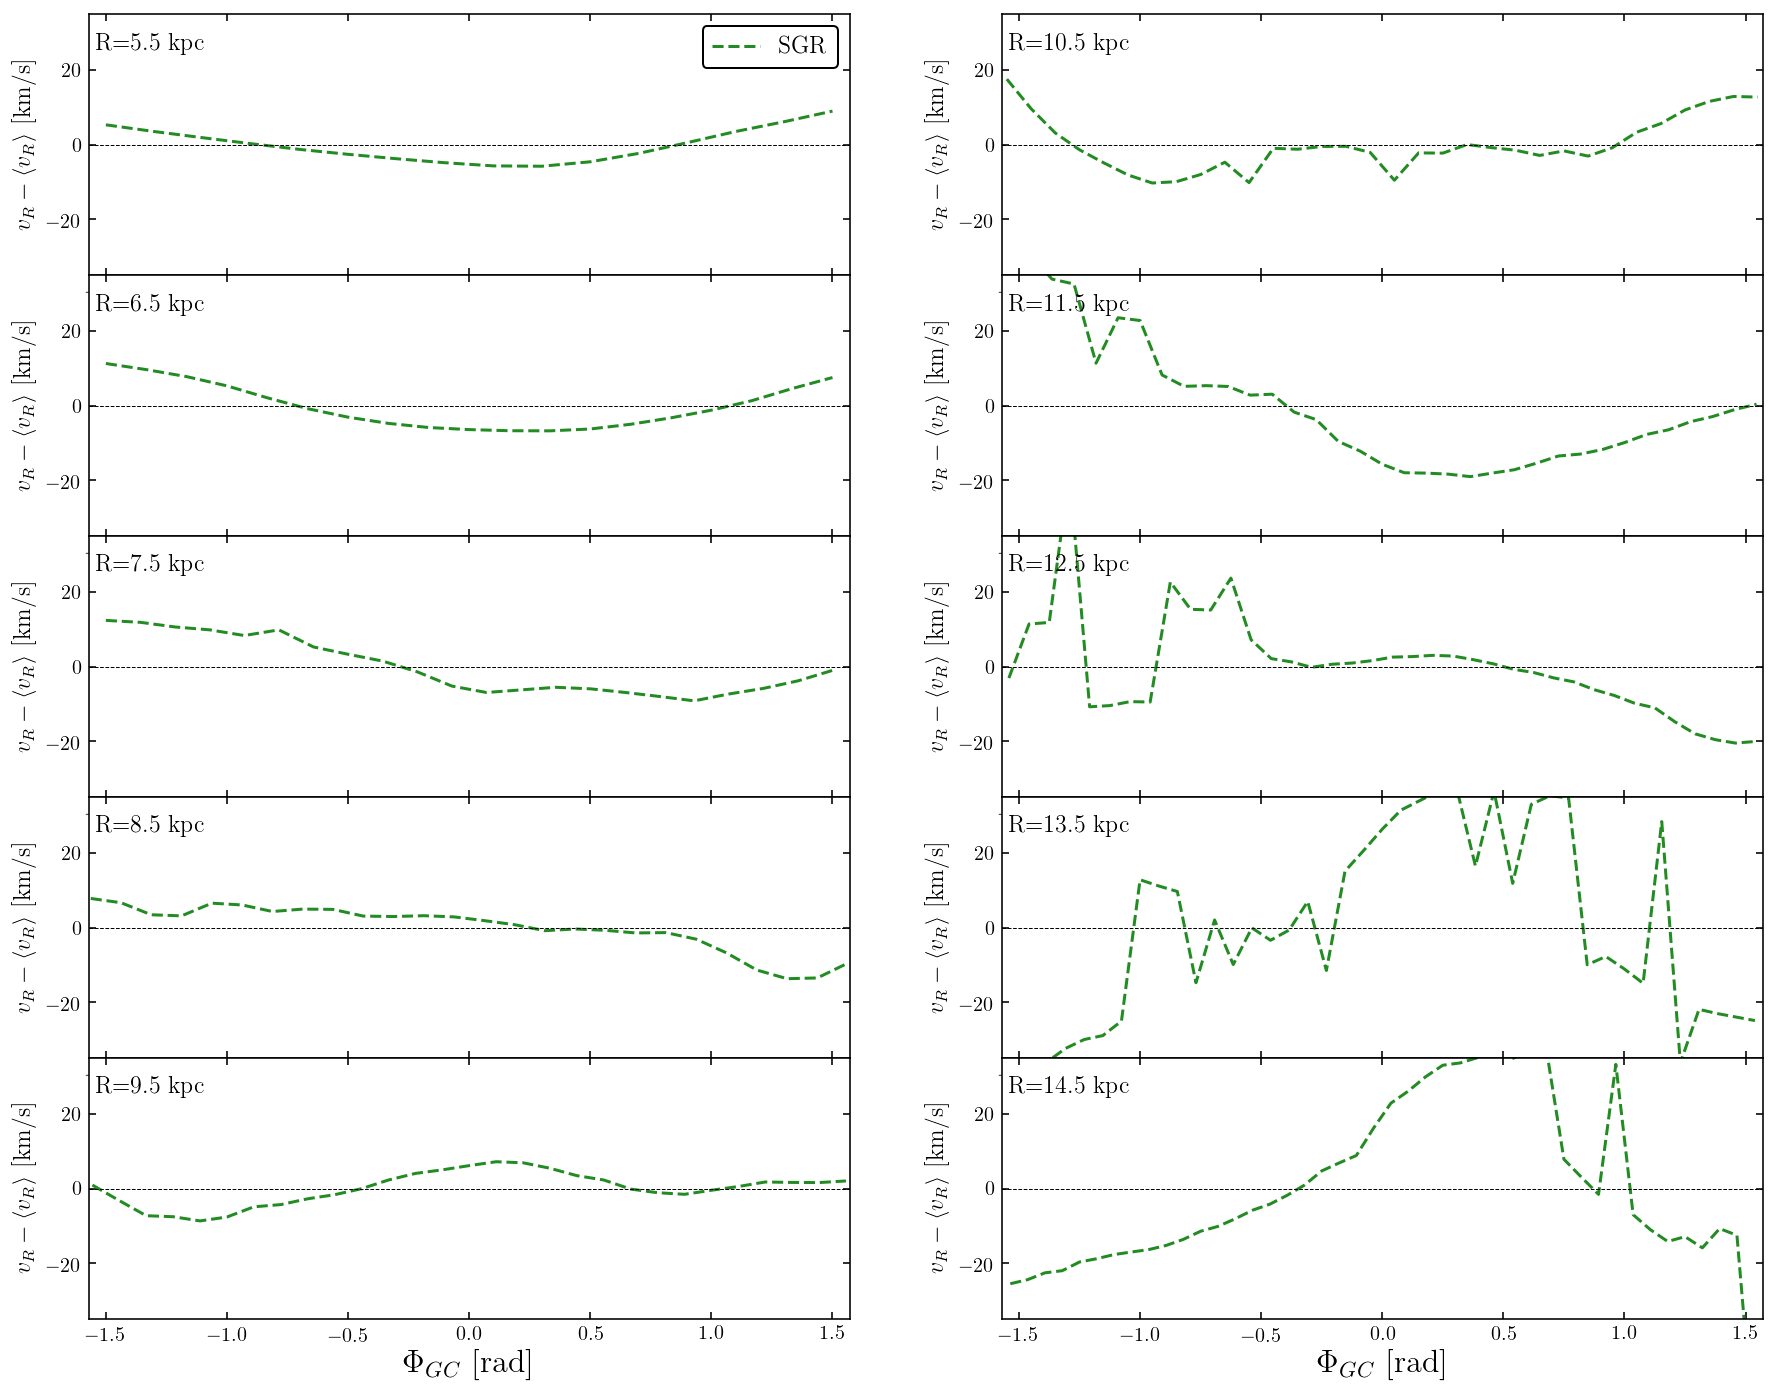

<Figure size 432x288 with 0 Axes>

In [20]:
vel_ind = 4 # Index for tangential velocity

# Make the figure. 4 columns of axes, one for each radial bin.
fig = plt.figure( figsize=(15,int(n_R)+2 ) )
axs = fig.subplots( nrows=int(n_R/2), ncols=2 ).T.reshape(n_R)

# Load the data
sgr_data = np.load( sgr_filename ).astype(float)
    
# Loop over each radial bin
for j in range( n_R ):

    # Load data
    where_current_R_sgr = np.where( sgr_data[:,0] == R_range[j] )[0]

    # Get the velocity and angle
    sgr_v = sgr_data[ where_current_R_sgr, vel_ind ]
    sgr_v -= np.mean(sgr_v)
    sgr_phi = sgr_data[ where_current_R_sgr, 1 ]

    # Plot the data
    axs[j].plot(sgr_phi, sgr_v, color='ForestGreen', linestyle='dashed',
                     label=labels[0])

    # Decorate
    axs[j].axhline(0, linestyle='dashed', color='Black', linewidth=0.5)
    axs[j].set_xlim(-np.pi/2,np.pi/2)
    axs[j].set_ylim(-35,35)
    axs[j].annotate(r'R='+str(R_range[j])+' kpc', (0.01,0.86), xycoords='axes fraction', fontsize=12)
    axs[j].set_ylabel(r'$v_{R}- \langle {v_{R}} \rangle$ [km/s]', fontsize=12)

    if j!=int((n_R/2)-1) or j!=int(n_R-1):
        axs[j].tick_params(labelbottom='off')
    ##fi
###j

# Final decorate
axs[0].legend(loc='best', fontsize=12)
axs[-1].set_xlabel(r'$\Phi_{GC}$ [rad]', fontsize=16)
axs[int(n_R/2)-1].set_xlabel(r'$\Phi_{GC}$ [rad]', fontsize=16)

fig.subplots_adjust(hspace=0)
fig.set_facecolor('white')
plt.show()
plt.savefig('plots/sgr_vt.pdf')
pass;
###i

# Plot differences between TWS+LSBAR-TWS and LSBAR

# Tangential velocity

Spiral arm lifetime: 0.12 Gyr
Spiral arm T0: -0.29 Gyr


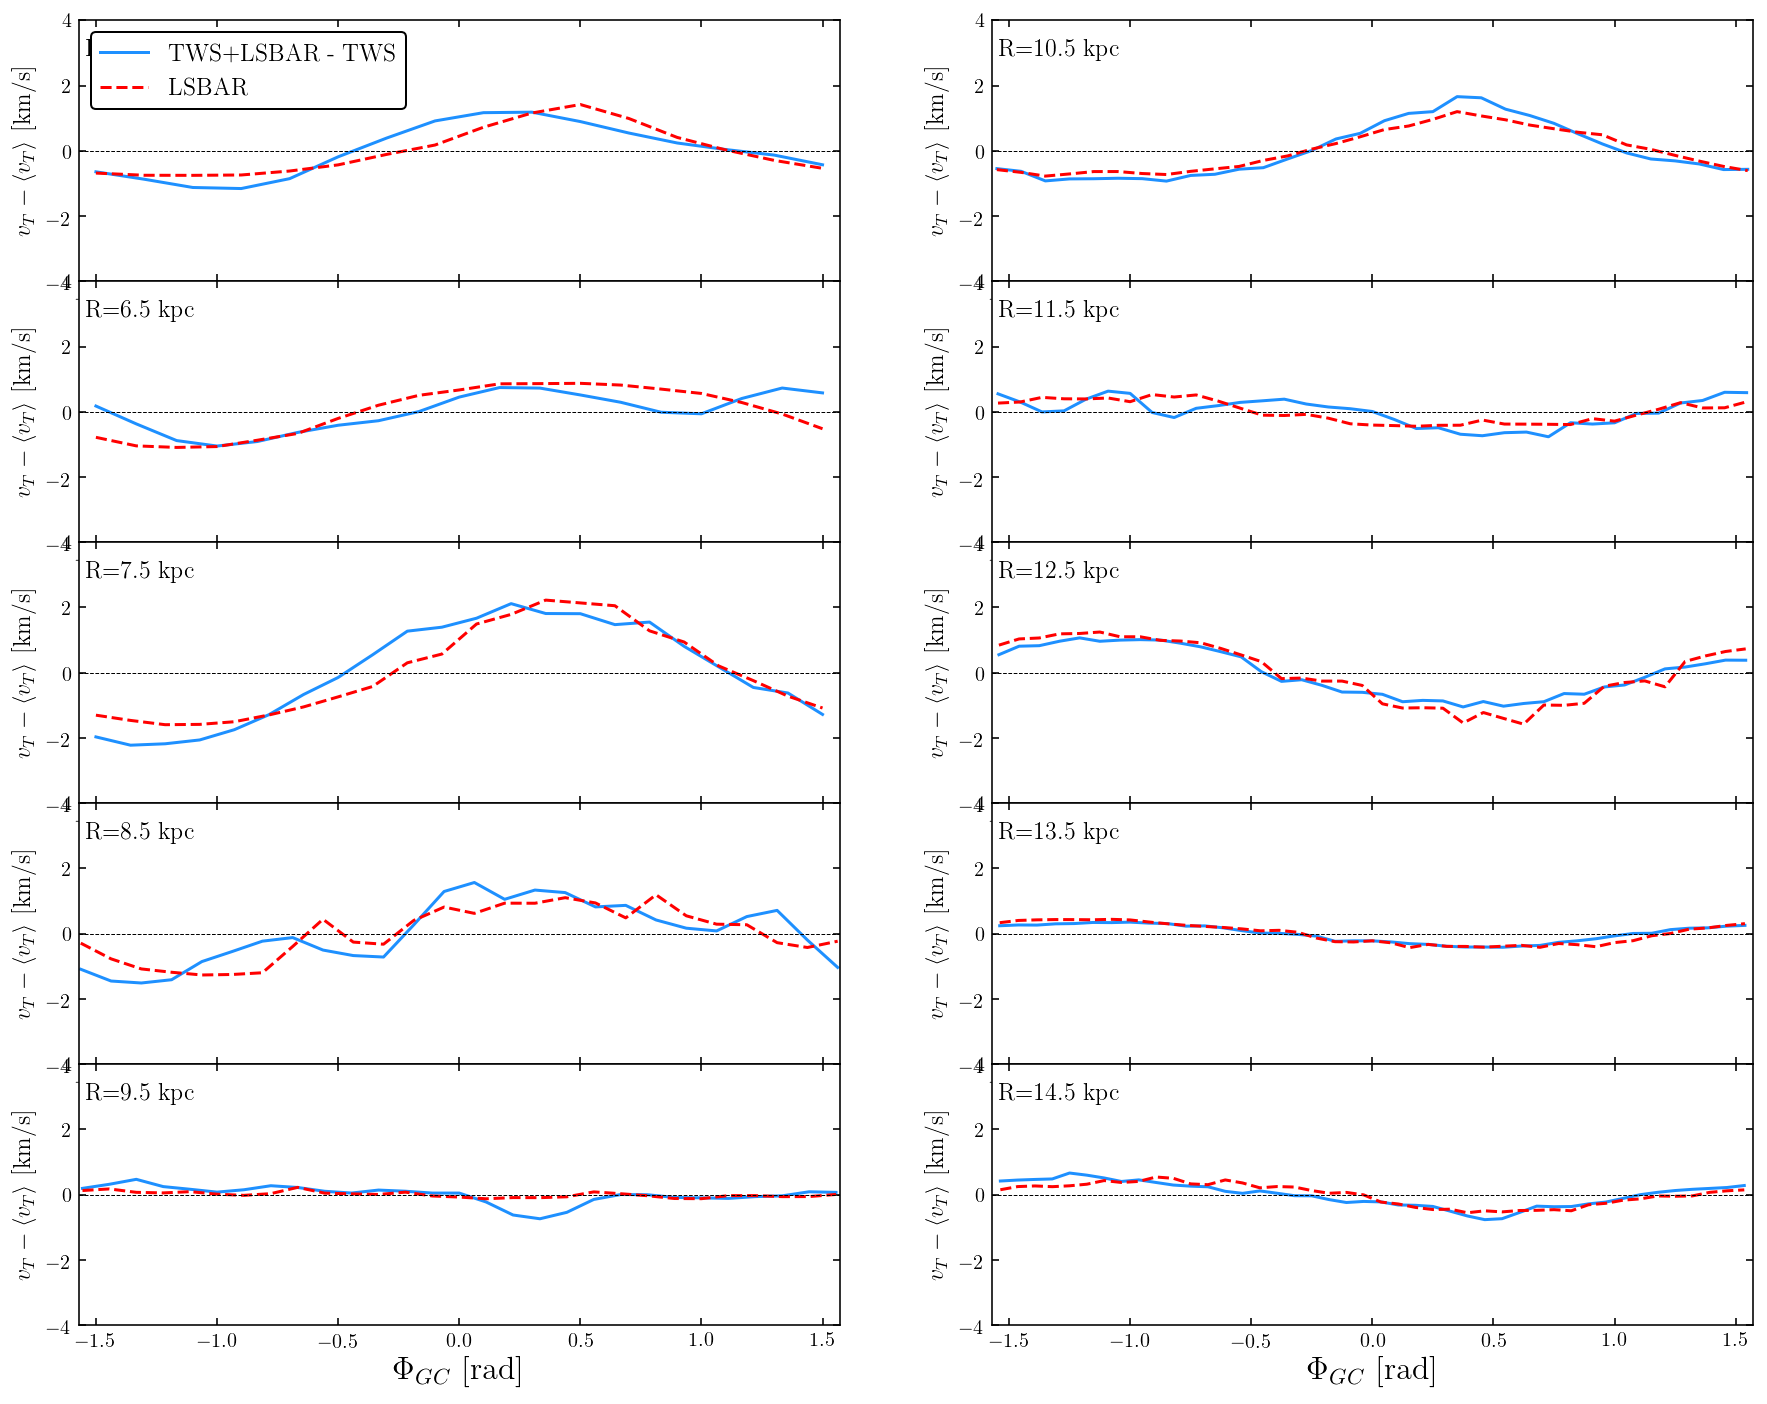

Spiral arm lifetime: 0.12 Gyr
Spiral arm T0: -0.86 Gyr


<Figure size 432x288 with 0 Axes>

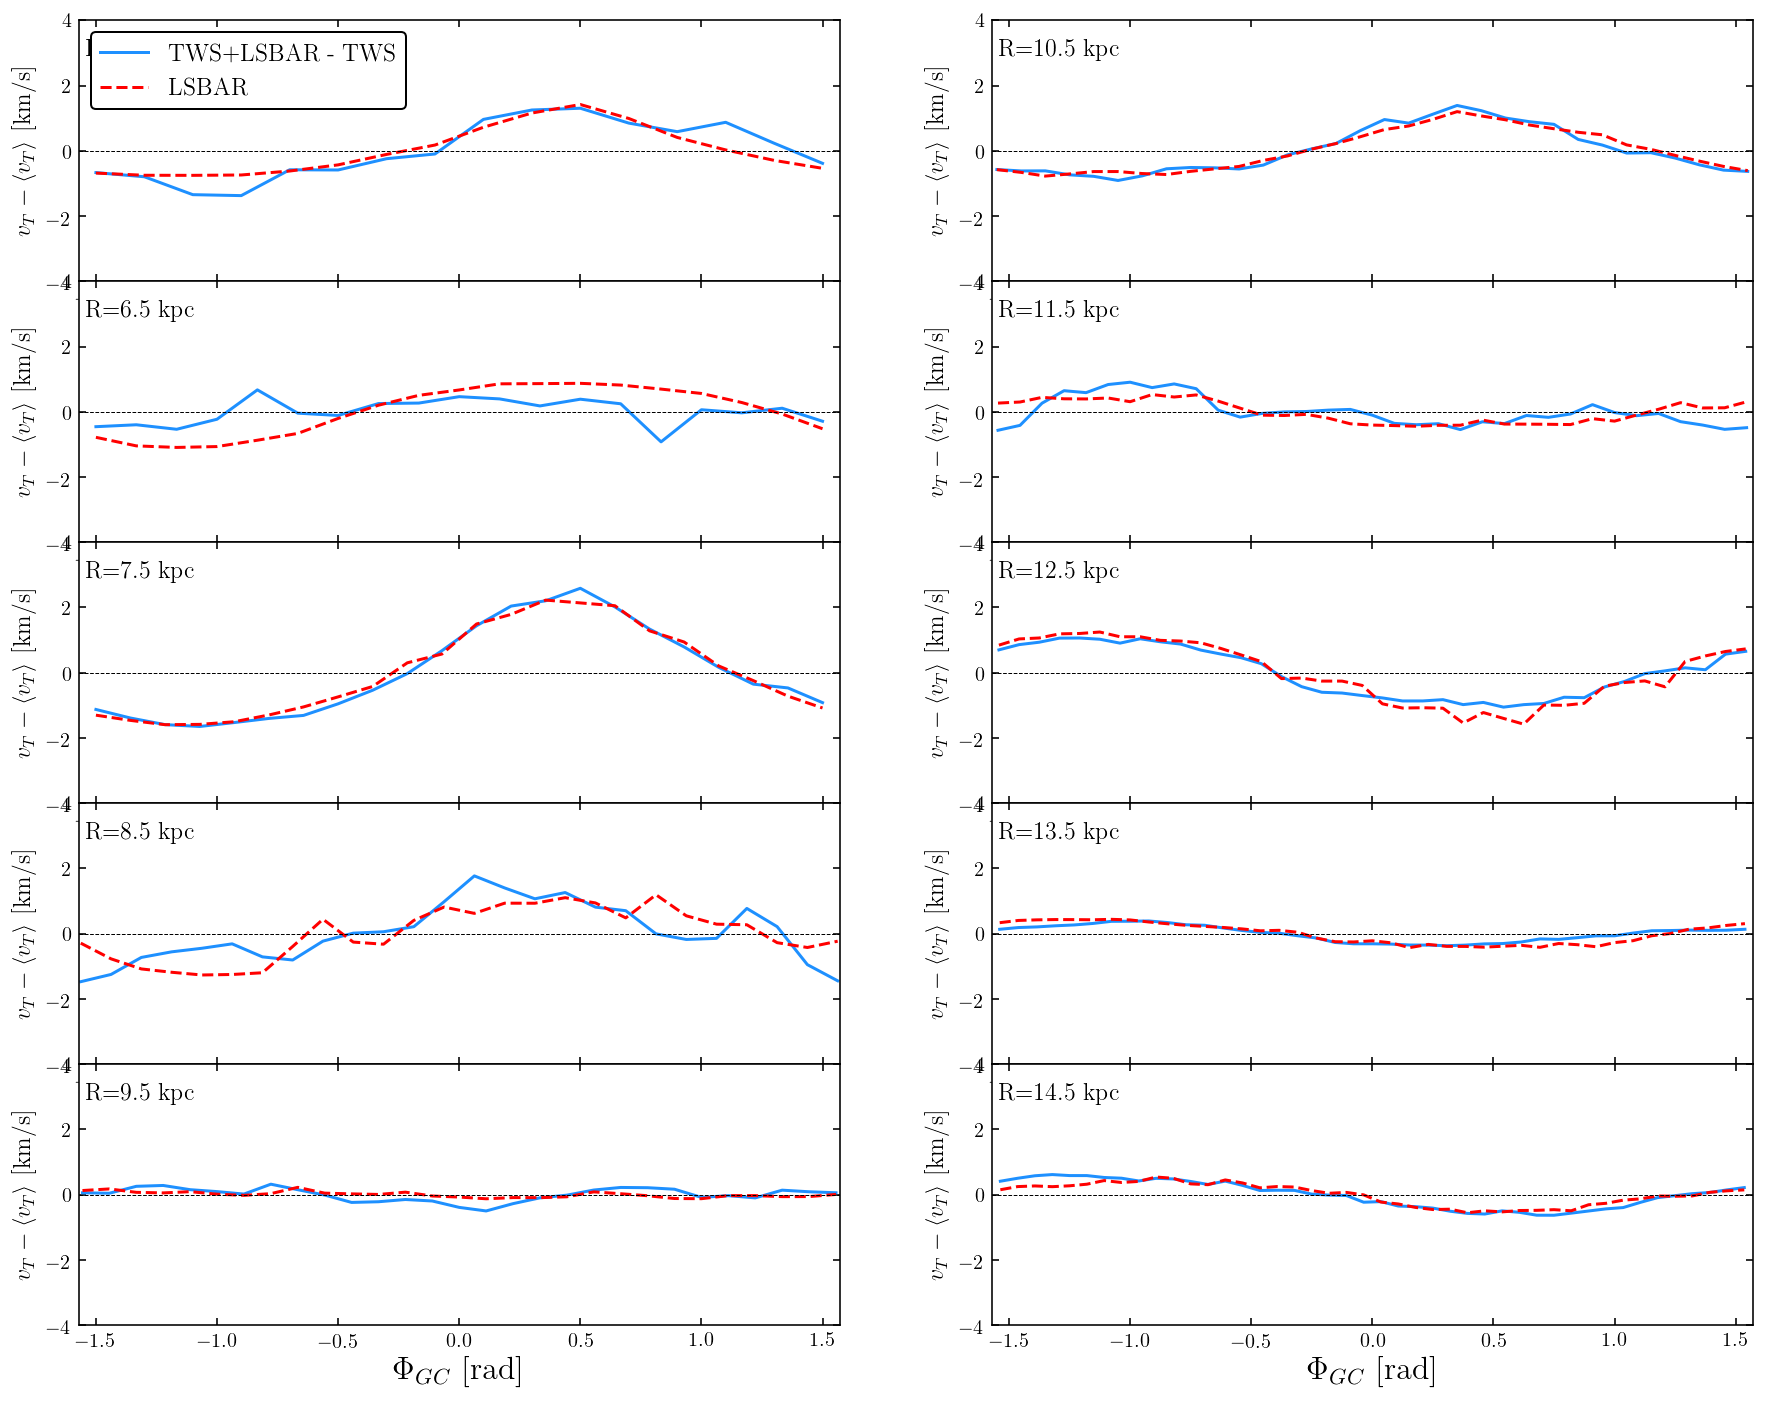

Spiral arm lifetime: 0.24 Gyr
Spiral arm T0: -0.29 Gyr


<Figure size 432x288 with 0 Axes>

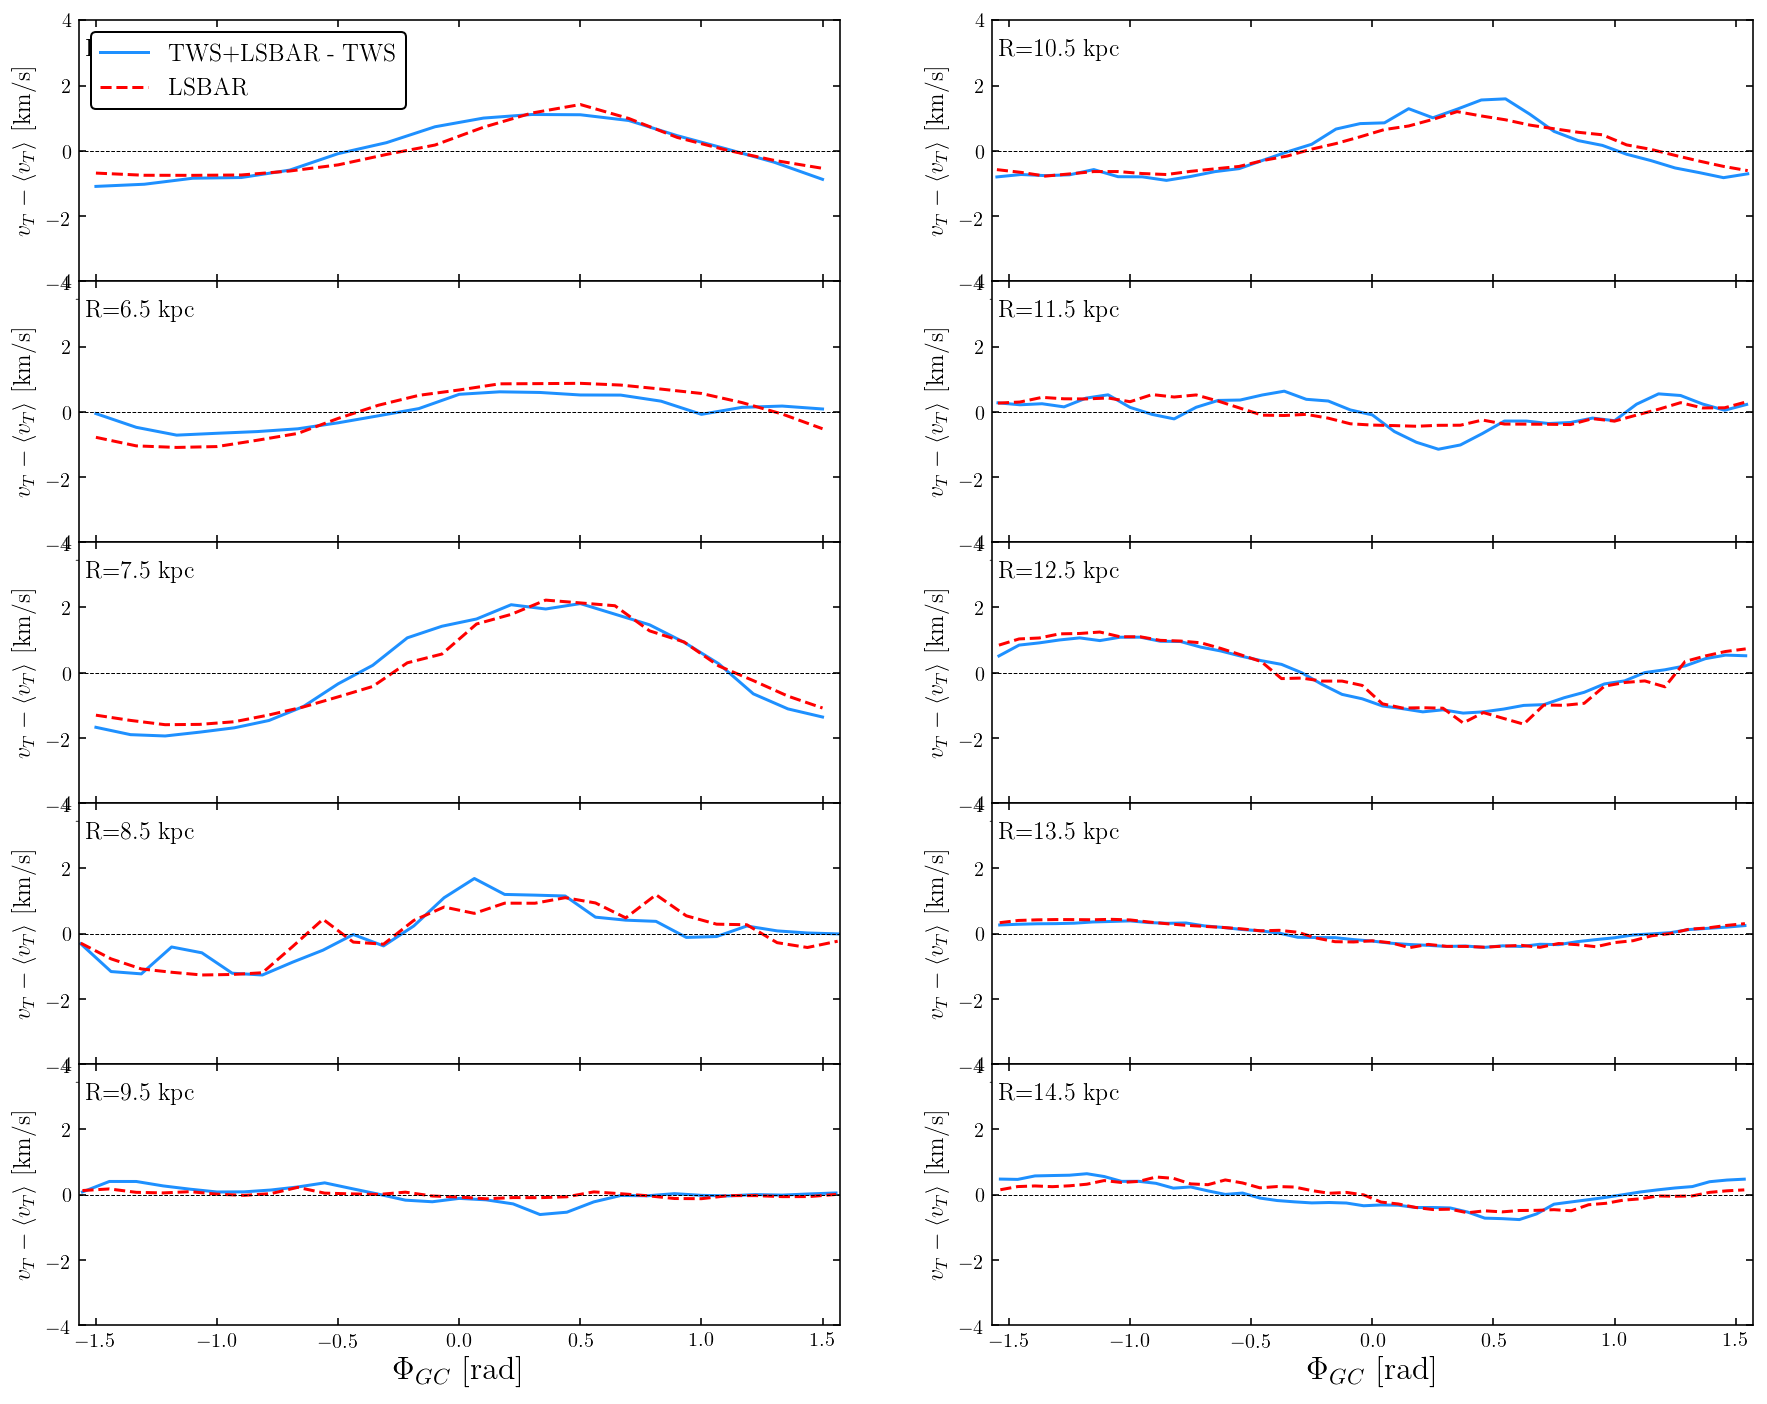

Spiral arm lifetime: 0.24 Gyr
Spiral arm T0: -0.86 Gyr


<Figure size 432x288 with 0 Axes>

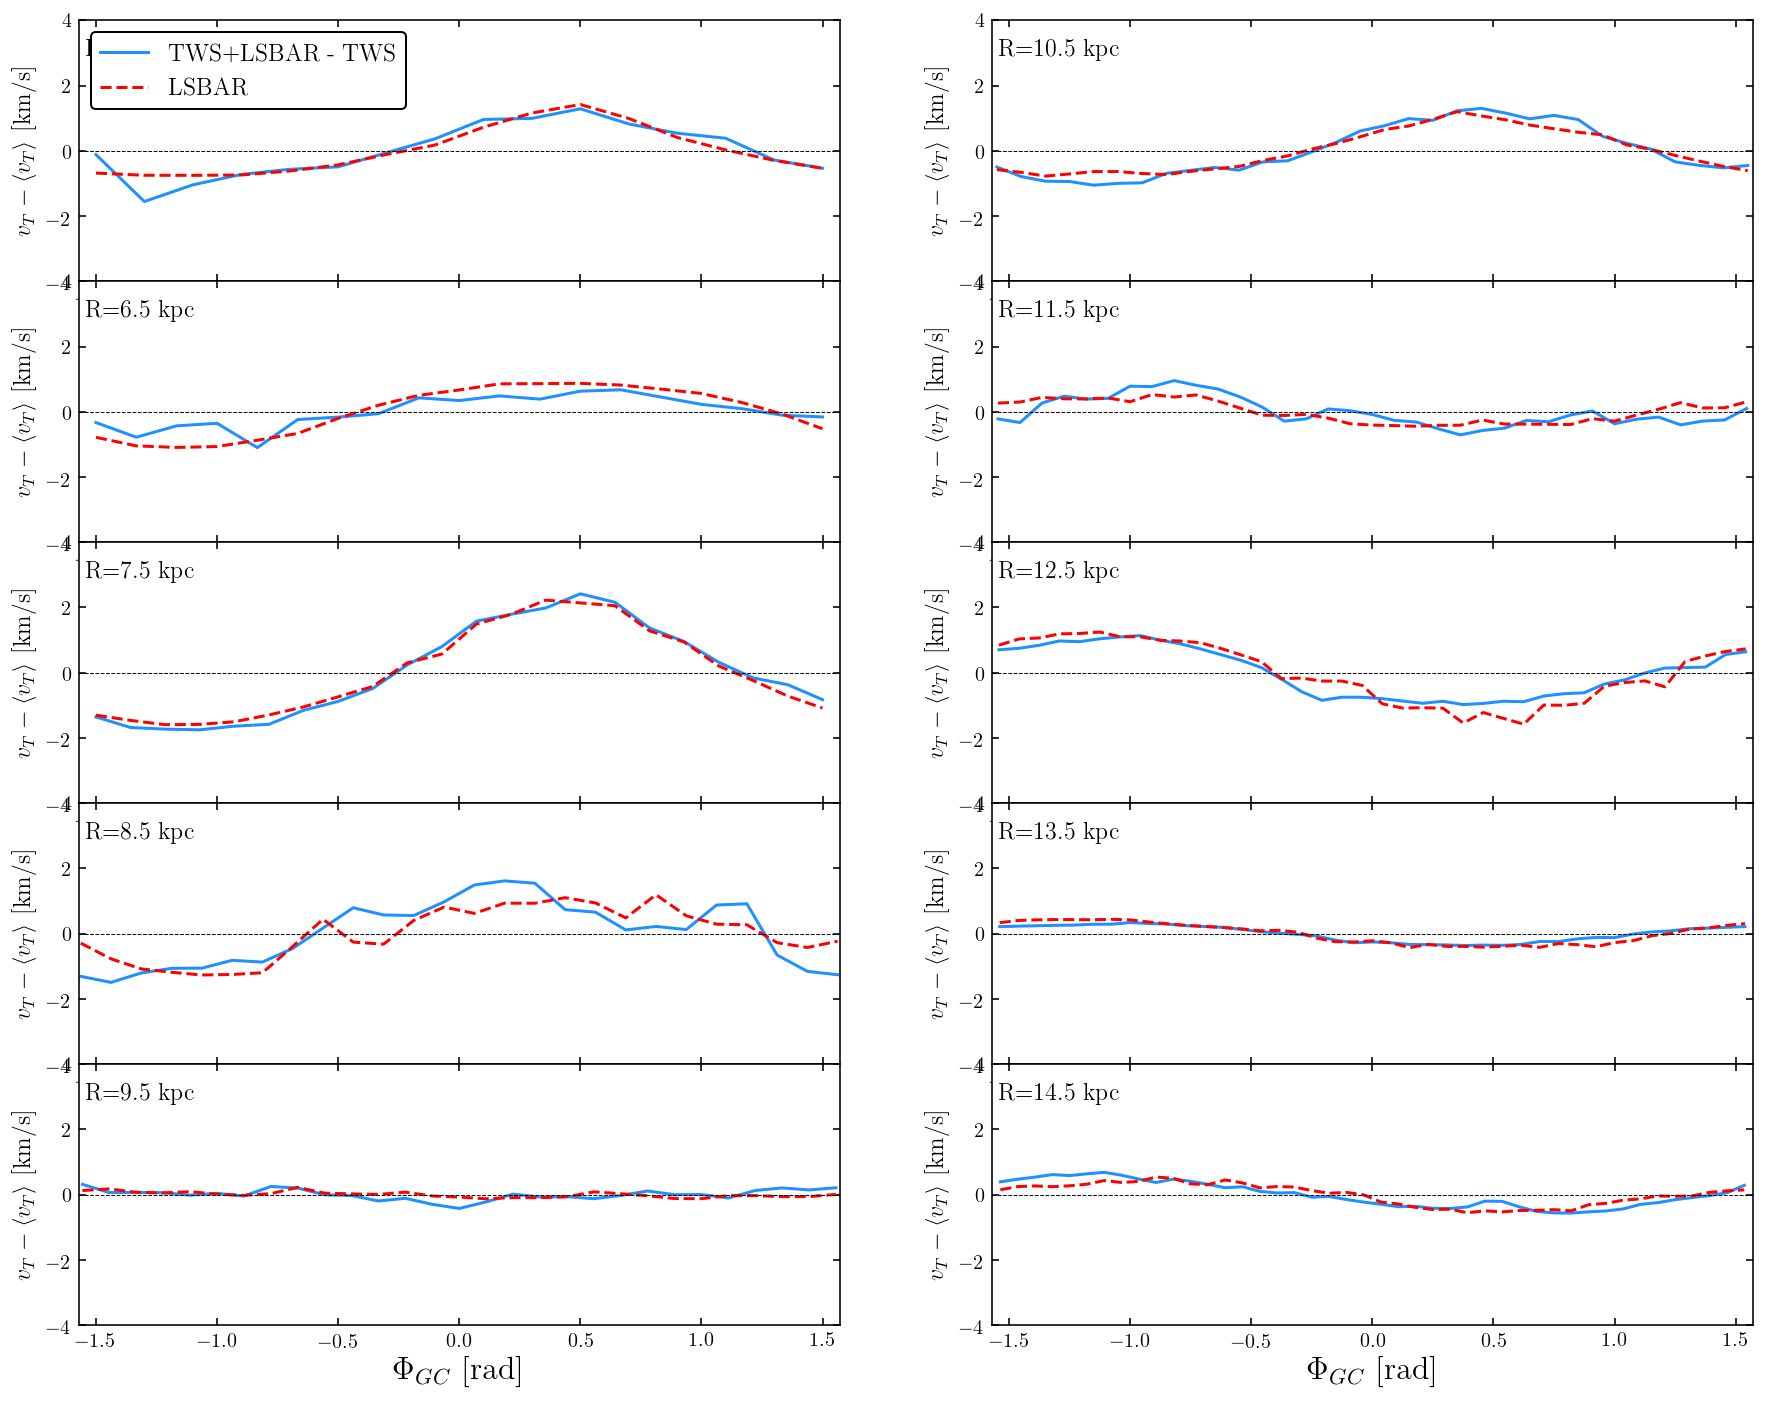

<Figure size 432x288 with 0 Axes>

In [42]:
vel_ind = 6 # Index for tangential velocity

# Now loop over each b value
for i in range( n_files ):
    
    # Make the figure. 4 columns of axes, one for each radial bin.
    fig = plt.figure( figsize=(15,int(n_R)+2 ) )
    axs = fig.subplots( nrows=int(n_R/2), ncols=2 ).T.reshape(n_R)
    
    # Load the data
    tws_data = np.load( tws_filenames[i] ).astype(float)
    tws_lsbar_data = np.load( tws_bar_filenames[i] ).astype(float)
    lsbar_data = np.load( lsbar_filename ).astype(float)
    
    # Loop over each radial bin
    for j in range( n_R ):
        
        # Load data
        where_current_R_tws = np.where( tws_data[:,0] == R_range[j] )[0]
        where_current_R_tws_lsbar = np.where( tws_lsbar_data[:,0] == R_range[j] )[0]
        where_current_R_lsbar = np.where( lsbar_data[:,0] == R_range[j] )[0]
        
        # Get the velocity and angle
        tws_v = tws_data[ where_current_R_tws, vel_ind ]
        tws_v -= np.mean(tws_v)
        tws_phi = tws_data[ where_current_R_tws, 1 ]
        tws_lsbar_v = tws_lsbar_data[ where_current_R_tws_lsbar, vel_ind ]
        tws_lsbar_v -= np.mean(tws_lsbar_v)
        tws_lsbar_phi = tws_lsbar_data[ where_current_R_tws_lsbar, 1 ]
        lsbar_v = lsbar_data[ where_current_R_lsbar, vel_ind ]
        lsbar_v -= np.mean(lsbar_v)
        lsbar_v /= 2
        lsbar_phi = lsbar_data[ where_current_R_lsbar, 1 ]
        
        # Plot the data
        axs[j].plot(tws_phi, tws_lsbar_v - tws_v, color='DodgerBlue', linestyle='solid',
                         label=labels[2])
        axs[j].plot(lsbar_phi, lsbar_v, color='Red', linestyle='dashed', 
                         label=labels[3])
        
        # Decorate
        axs[j].axhline(0, linestyle='dashed', color='Black', linewidth=0.5)
        axs[j].set_xlim(-np.pi/2,np.pi/2)
        axs[j].set_ylim(-4,4)
        axs[j].annotate(r'R='+str(R_range[j])+' kpc', (0.01,0.86), xycoords='axes fraction', fontsize=12)
        axs[j].set_ylabel(r'$v_{T}- \langle {v_{T}} \rangle$ [km/s]', fontsize=12)
        
        if j!=int((n_R/2)-1) or j!=int(n_R-1):
            axs[j].tick_params(labelbottom='off')
        ##fi
    ###j
    
    # Final decorate
    axs[0].legend(loc='best', fontsize=12)
    axs[-1].set_xlabel(r'$\Phi_{GC}$ [rad]', fontsize=16)
    axs[int(n_R/2)-1].set_xlabel(r'$\Phi_{GC}$ [rad]', fontsize=16)
    
    print('Spiral arm lifetime: '+LIFETIMES[i]+' Gyr')
    print('Spiral arm T0: '+T_0s[i]+' Gyr')
    
    fig.subplots_adjust(hspace=0)
    fig.set_facecolor('white')
    plt.show()
    plt.savefig('plots/tws_lsbar_vt_diff_lifetime_'+LIFETIMES[i]+'_T0_'+T_0s[i]+'.pdf')
    pass;
###i

# Plot Radial Velocity

Spiral arm lifetime: 0.12 Gyr
Spiral arm T0: -0.29 Gyr


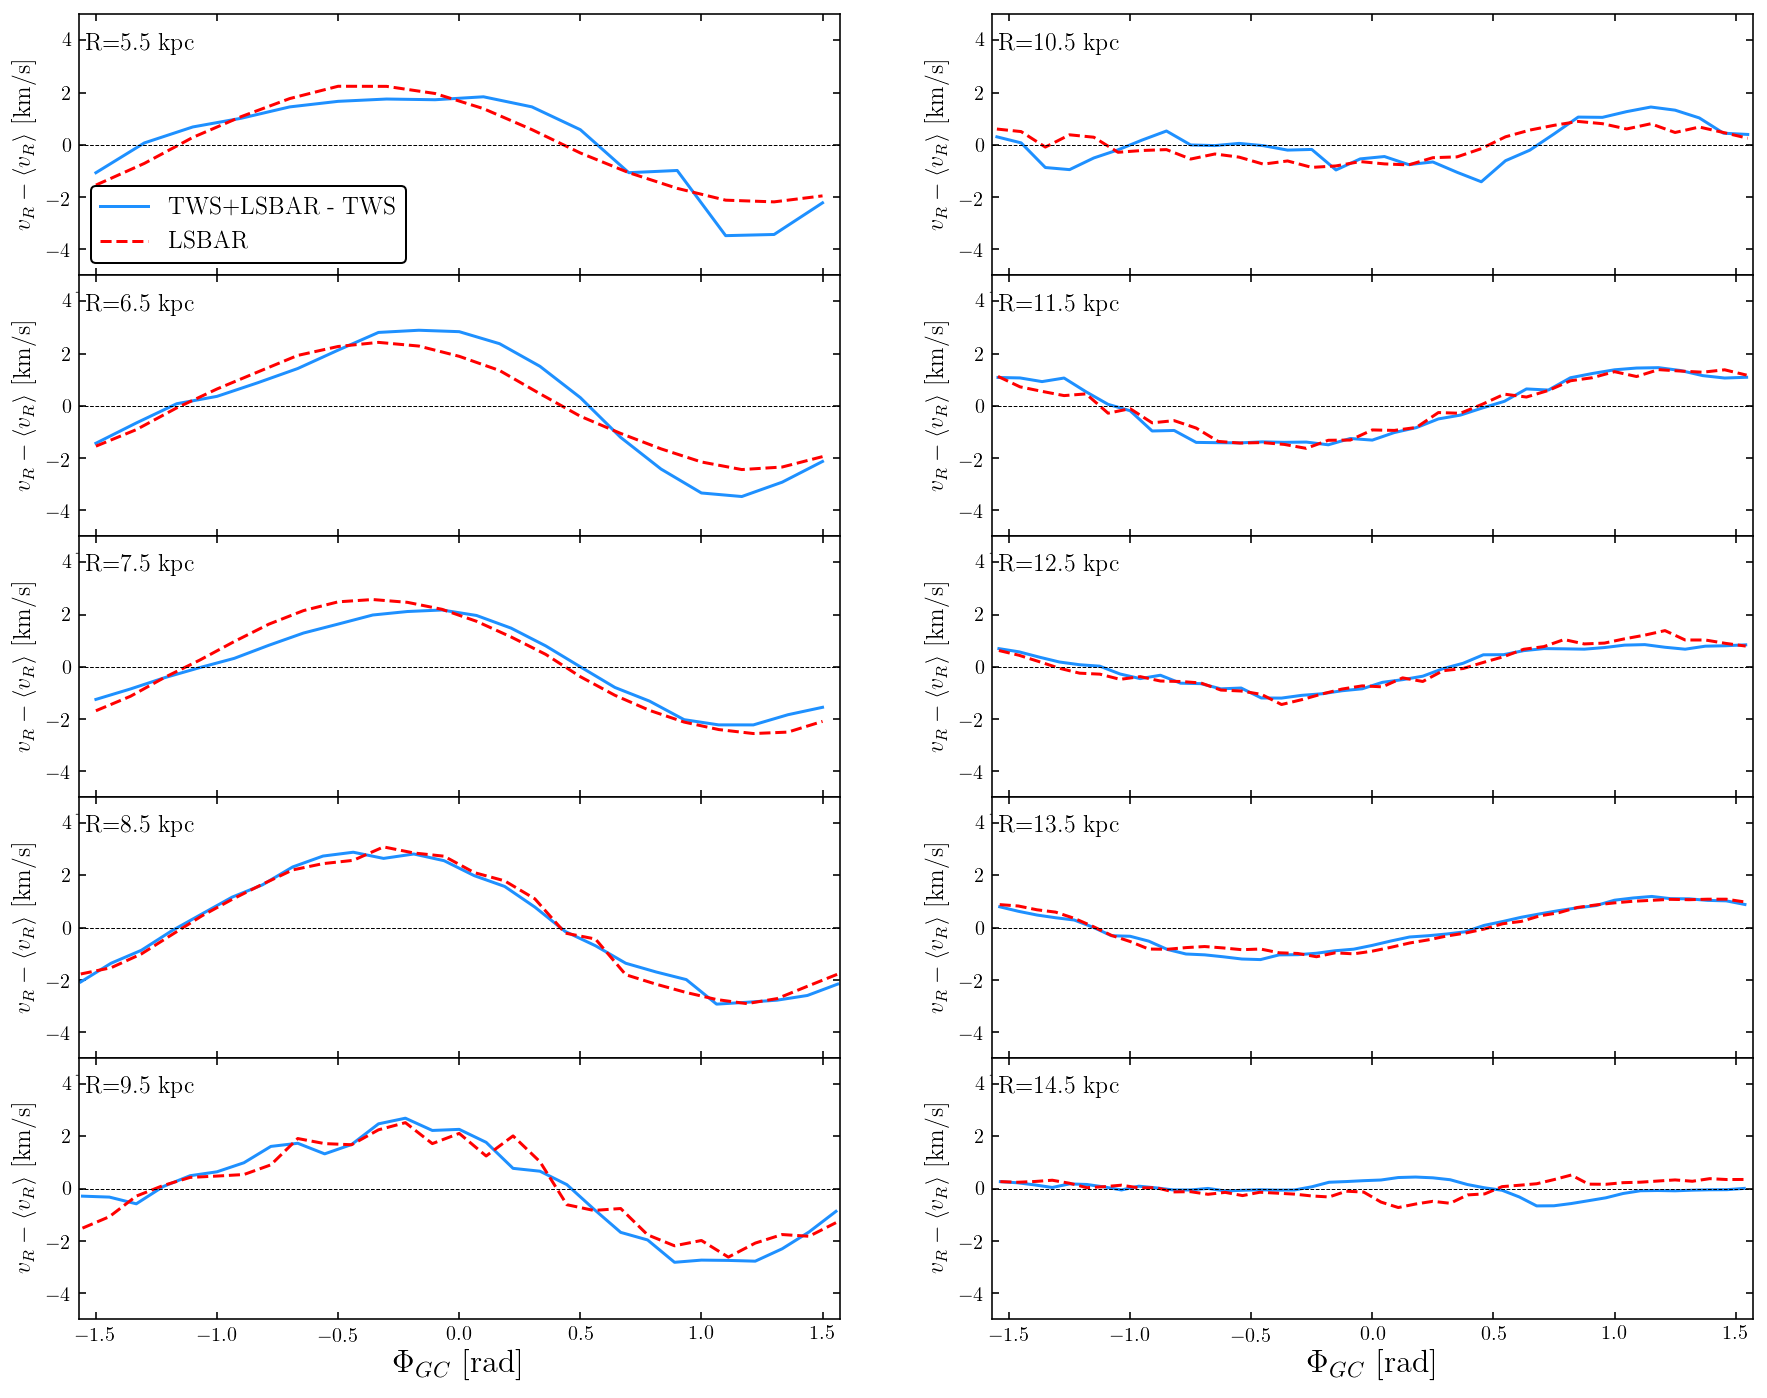

Spiral arm lifetime: 0.12 Gyr
Spiral arm T0: -0.86 Gyr


<Figure size 432x288 with 0 Axes>

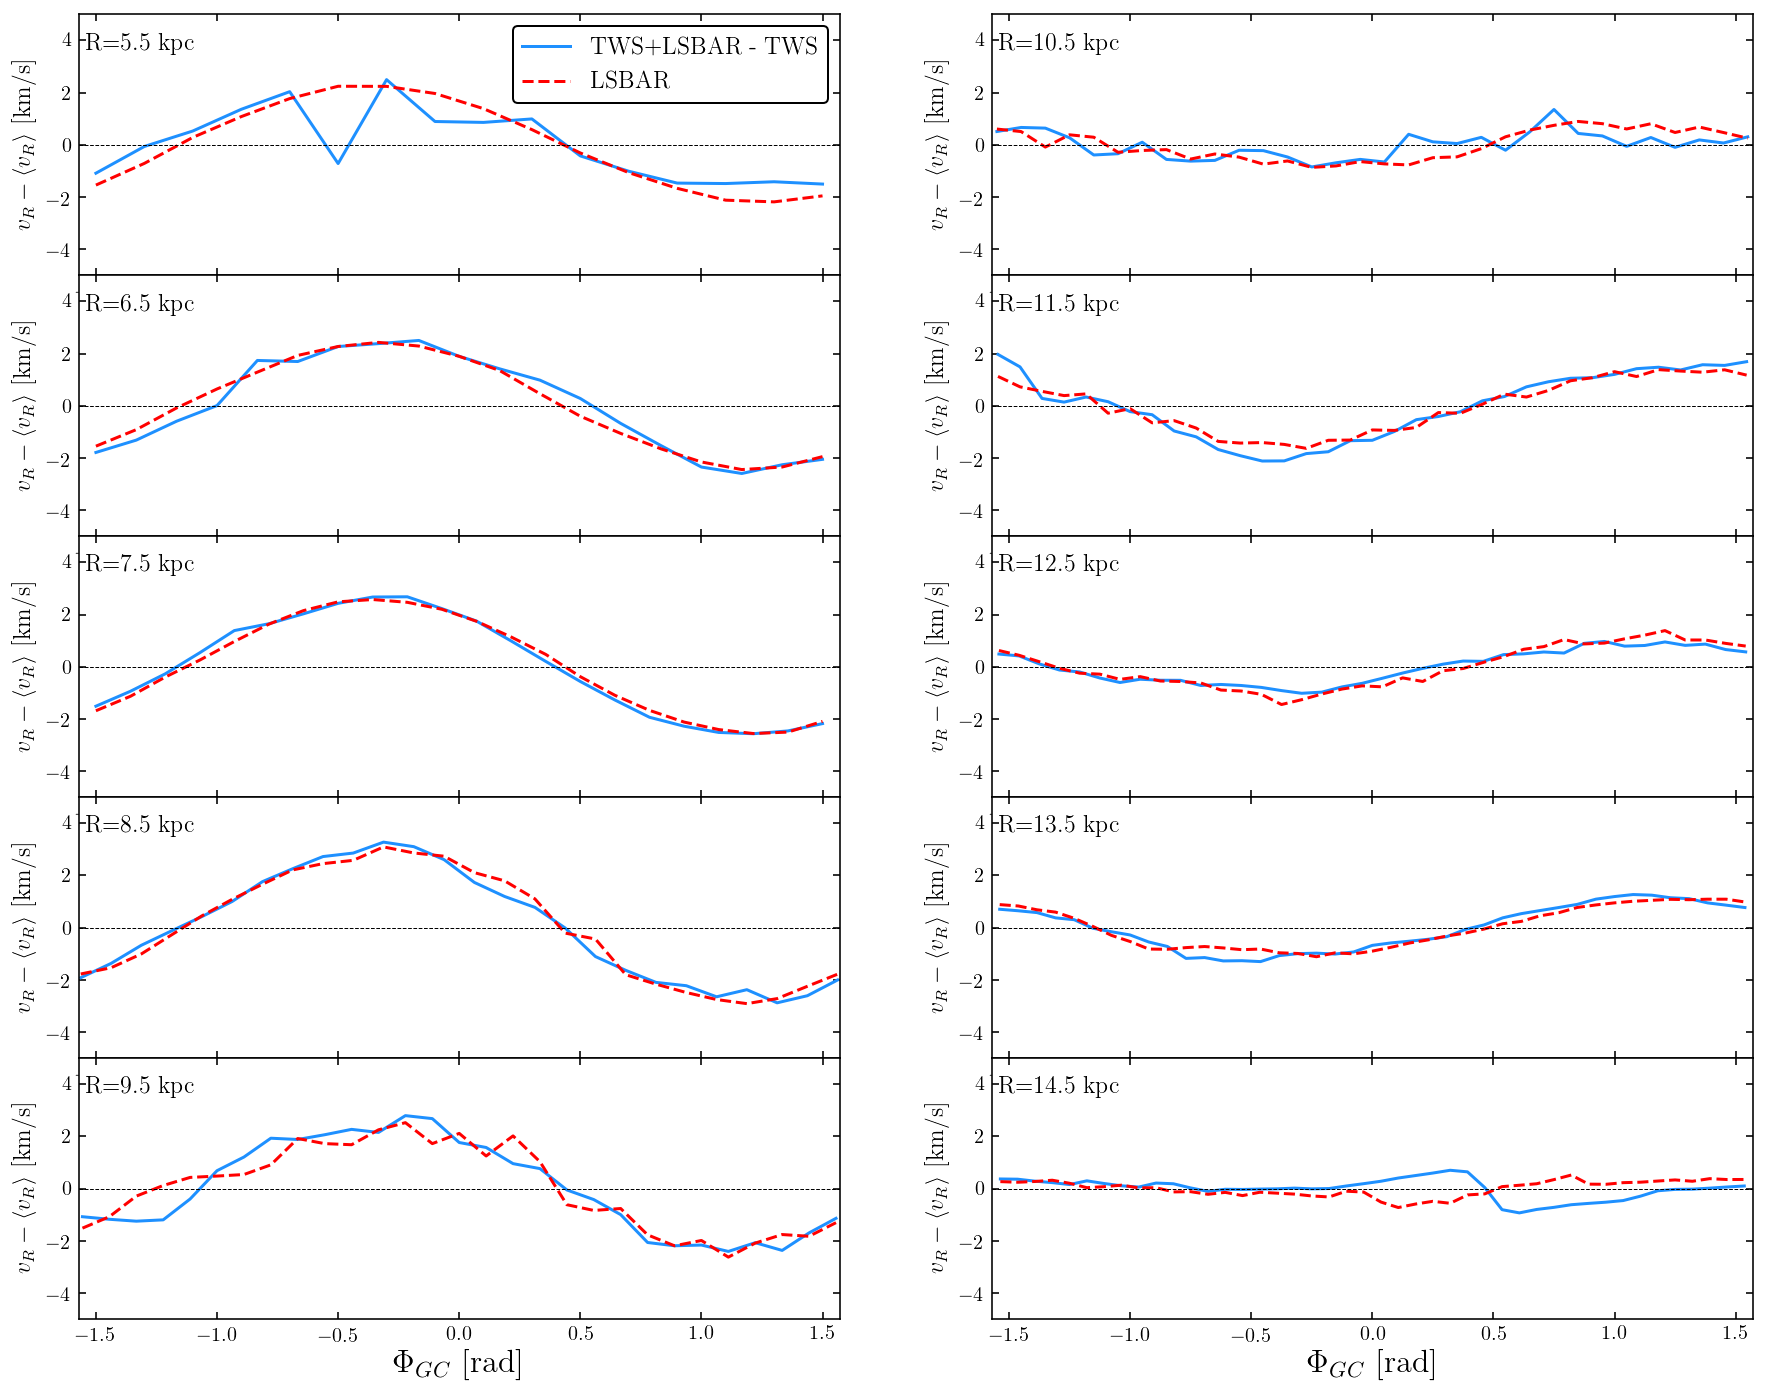

Spiral arm lifetime: 0.24 Gyr
Spiral arm T0: -0.29 Gyr


<Figure size 432x288 with 0 Axes>

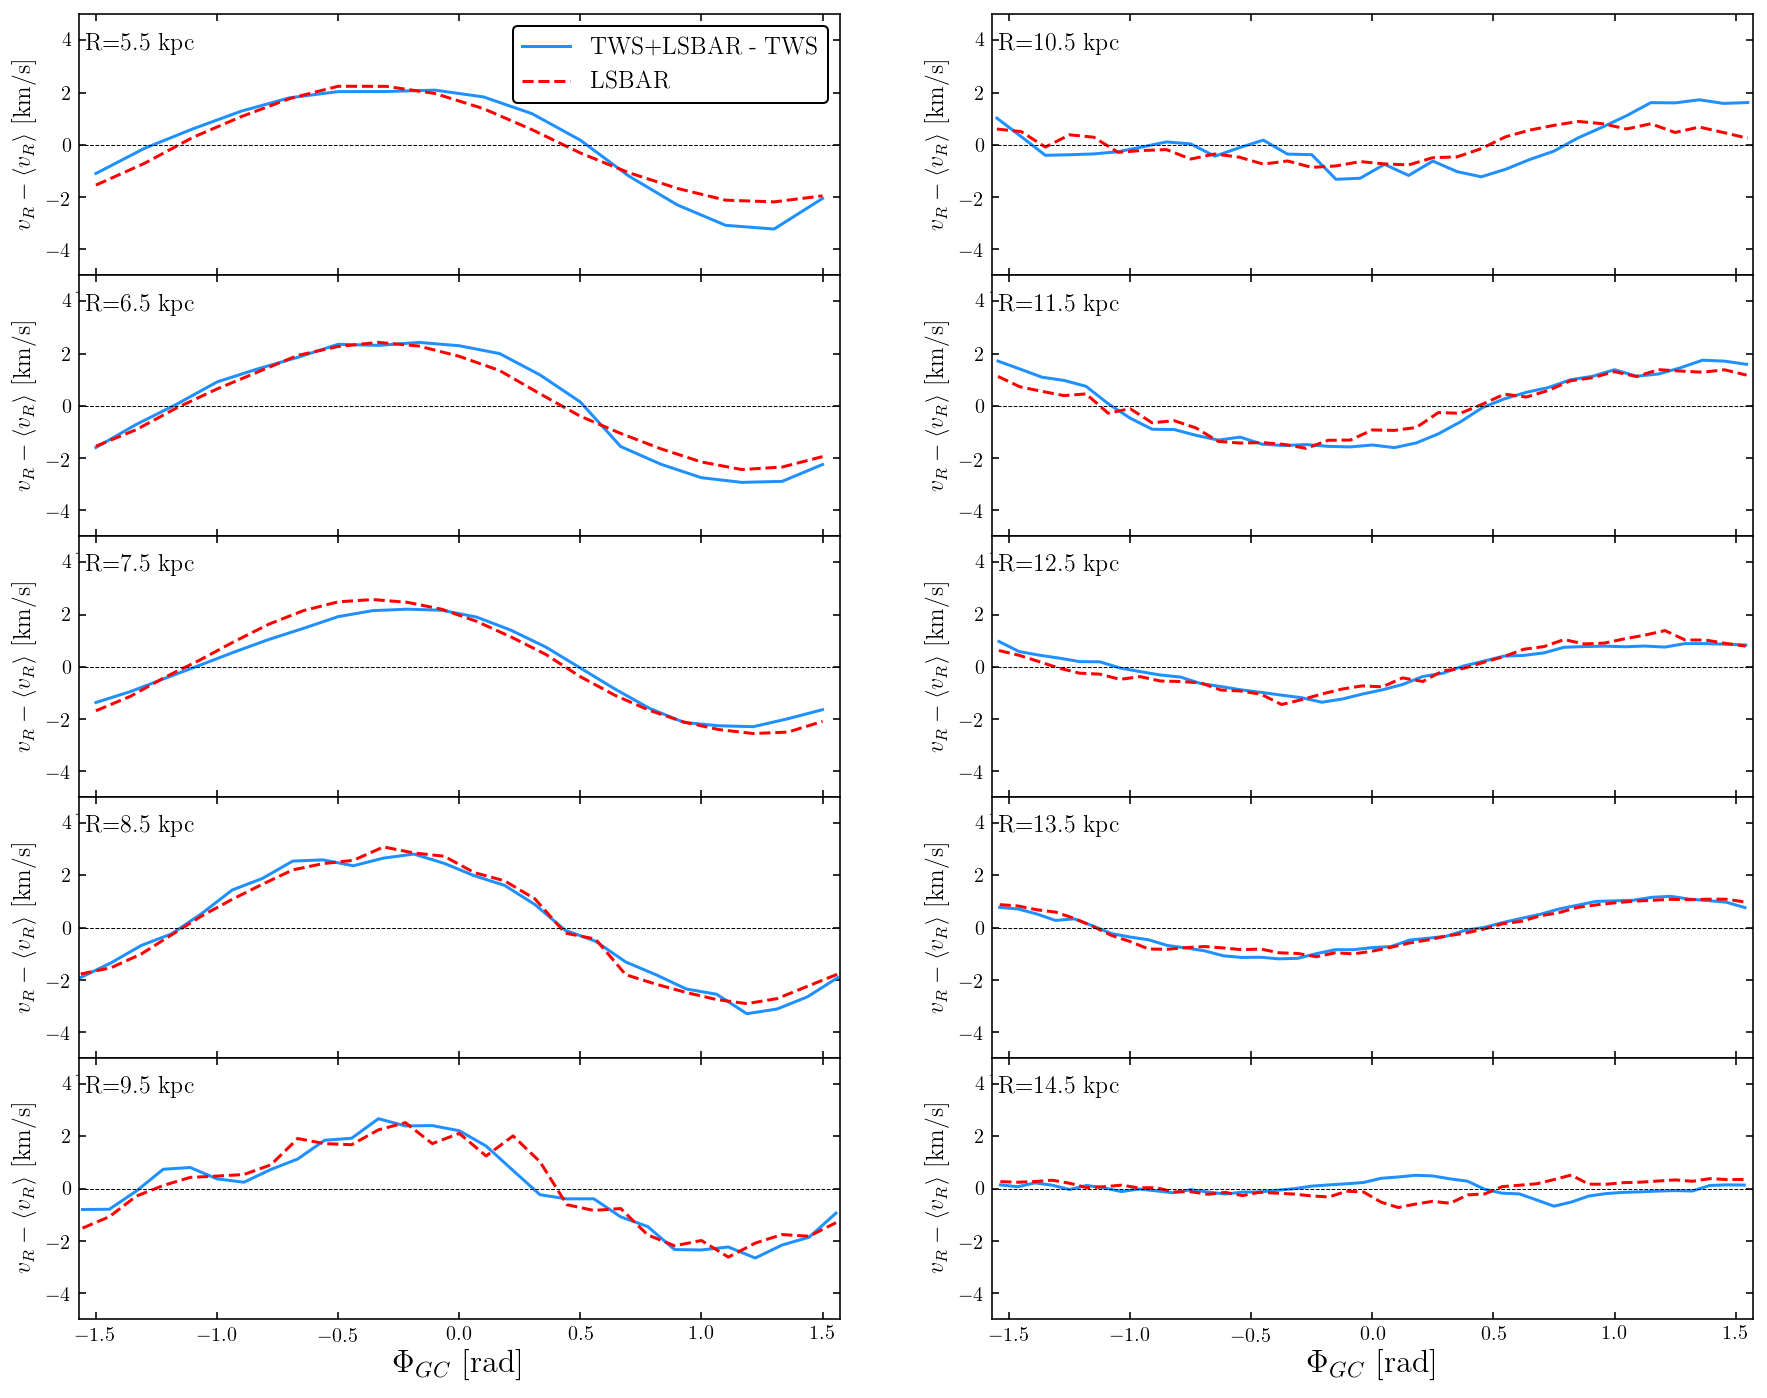

Spiral arm lifetime: 0.24 Gyr
Spiral arm T0: -0.86 Gyr


<Figure size 432x288 with 0 Axes>

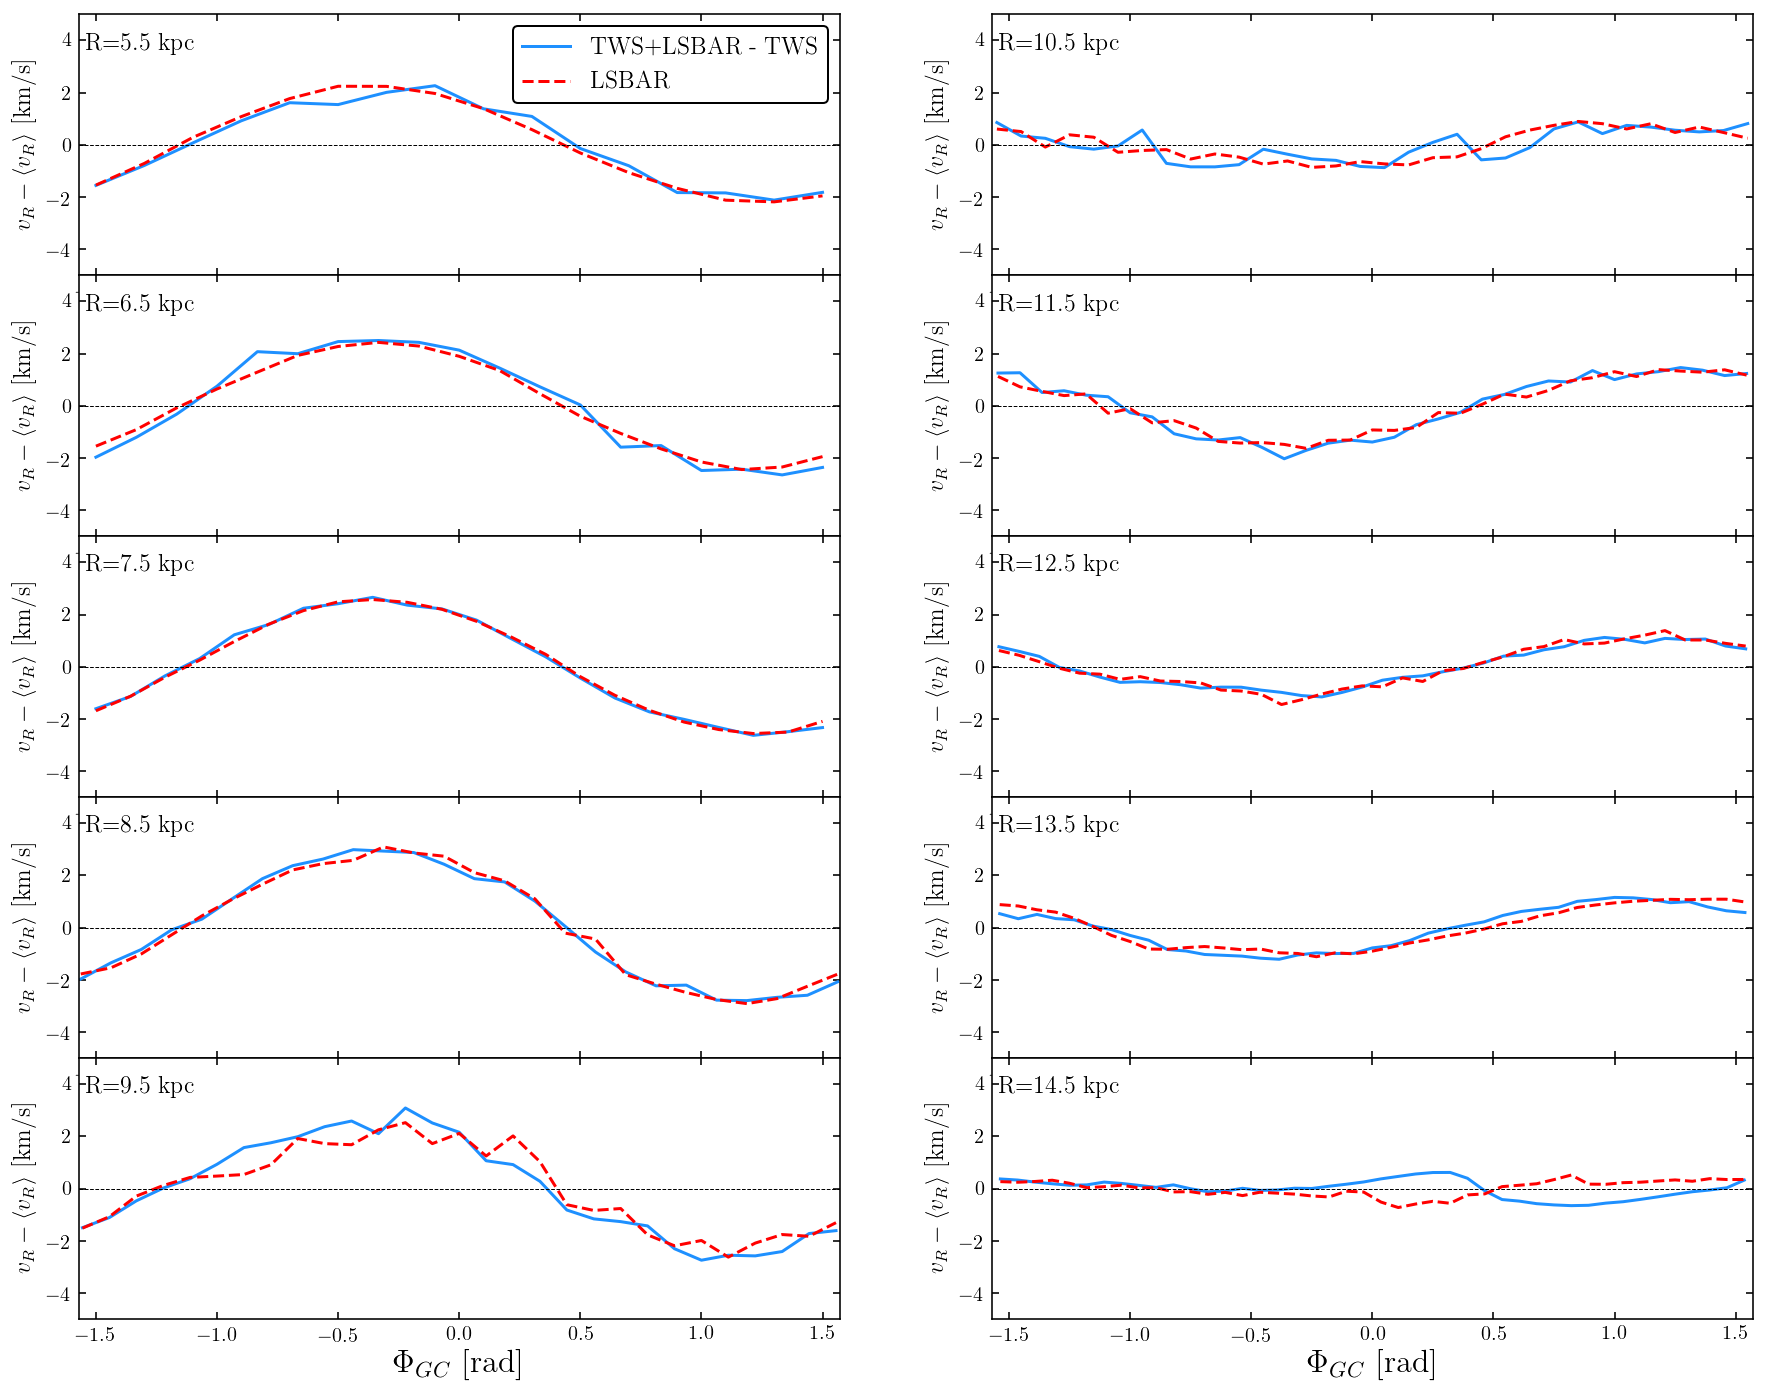

<Figure size 432x288 with 0 Axes>

In [43]:
vel_ind = 4 # Index for tangential velocity

# Now loop over each b value
for i in range( n_files ):
    
    # Make the figure. 4 columns of axes, one for each radial bin.
    fig = plt.figure( figsize=(15,int(n_R)+2 ) )
    axs = fig.subplots( nrows=int(n_R/2), ncols=2 ).T.reshape(n_R)
    
    # Load the data
    tws_data = np.load( tws_filenames[i] ).astype(float)
    tws_lsbar_data = np.load( tws_bar_filenames[i] ).astype(float)
    lsbar_data = np.load( lsbar_filename ).astype(float)
    
    # Loop over each radial bin
    for j in range( n_R ):
        
        # Load data
        where_current_R_tws = np.where( tws_data[:,0] == R_range[j] )[0]
        where_current_R_tws_lsbar = np.where( tws_lsbar_data[:,0] == R_range[j] )[0]
        where_current_R_lsbar = np.where( lsbar_data[:,0] == R_range[j] )[0]
        
        # Get the velocity and angle
        tws_v = tws_data[ where_current_R_tws, vel_ind ]
        tws_v -= np.mean(tws_v)
        tws_phi = tws_data[ where_current_R_tws, 1 ]
        tws_lsbar_v = tws_lsbar_data[ where_current_R_tws_lsbar, vel_ind ]
        tws_lsbar_v -= np.mean(tws_lsbar_v)
        tws_lsbar_phi = tws_lsbar_data[ where_current_R_tws_lsbar, 1 ]
        lsbar_v = lsbar_data[ where_current_R_lsbar, vel_ind ]
        lsbar_v -= np.mean(lsbar_v)
        lsbar_v /= 2
        lsbar_phi = lsbar_data[ where_current_R_lsbar, 1 ]
        
        # Plot the data
        axs[j].plot(tws_phi, tws_lsbar_v - tws_v, color='DodgerBlue', linestyle='solid',
                         label=labels[2])
        axs[j].plot(lsbar_phi, lsbar_v, color='Red', linestyle='dashed', 
                         label=labels[3])
        
        # Decorate
        axs[j].axhline(0, linestyle='dashed', color='Black', linewidth=0.5)
        axs[j].set_xlim(-np.pi/2,np.pi/2)
        axs[j].set_ylim(-5,5)
        axs[j].annotate(r'R='+str(R_range[j])+' kpc', (0.01,0.86), xycoords='axes fraction', fontsize=12)
        axs[j].set_ylabel(r'$v_{R}- \langle {v_{R}} \rangle$ [km/s]', fontsize=12)
        
        if j!=int((n_R/2)-1) or j!=int(n_R-1):
            axs[j].tick_params(labelbottom='off')
        ##fi
    ###j
    
    # Final decorate
    axs[0].legend(loc='best', fontsize=12)
    axs[-1].set_xlabel(r'$\Phi_{GC}$ [rad]', fontsize=16)
    axs[int(n_R/2)-1].set_xlabel(r'$\Phi_{GC}$ [rad]', fontsize=16)
    
    print('Spiral arm lifetime: '+LIFETIMES[i]+' Gyr')
    print('Spiral arm T0: '+T_0s[i]+' Gyr')
    
    fig.subplots_adjust(hspace=0)
    fig.set_facecolor('white')
    plt.show()
    plt.savefig('plots/tws_lsbar_vR_diff_lifetime_'+LIFETIMES[i]+'_T0_'+T_0s[i]+'.pdf')
    pass;
###i